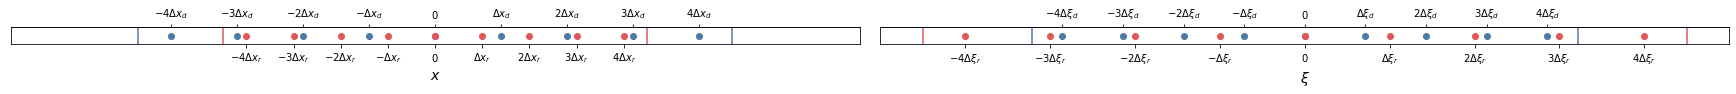

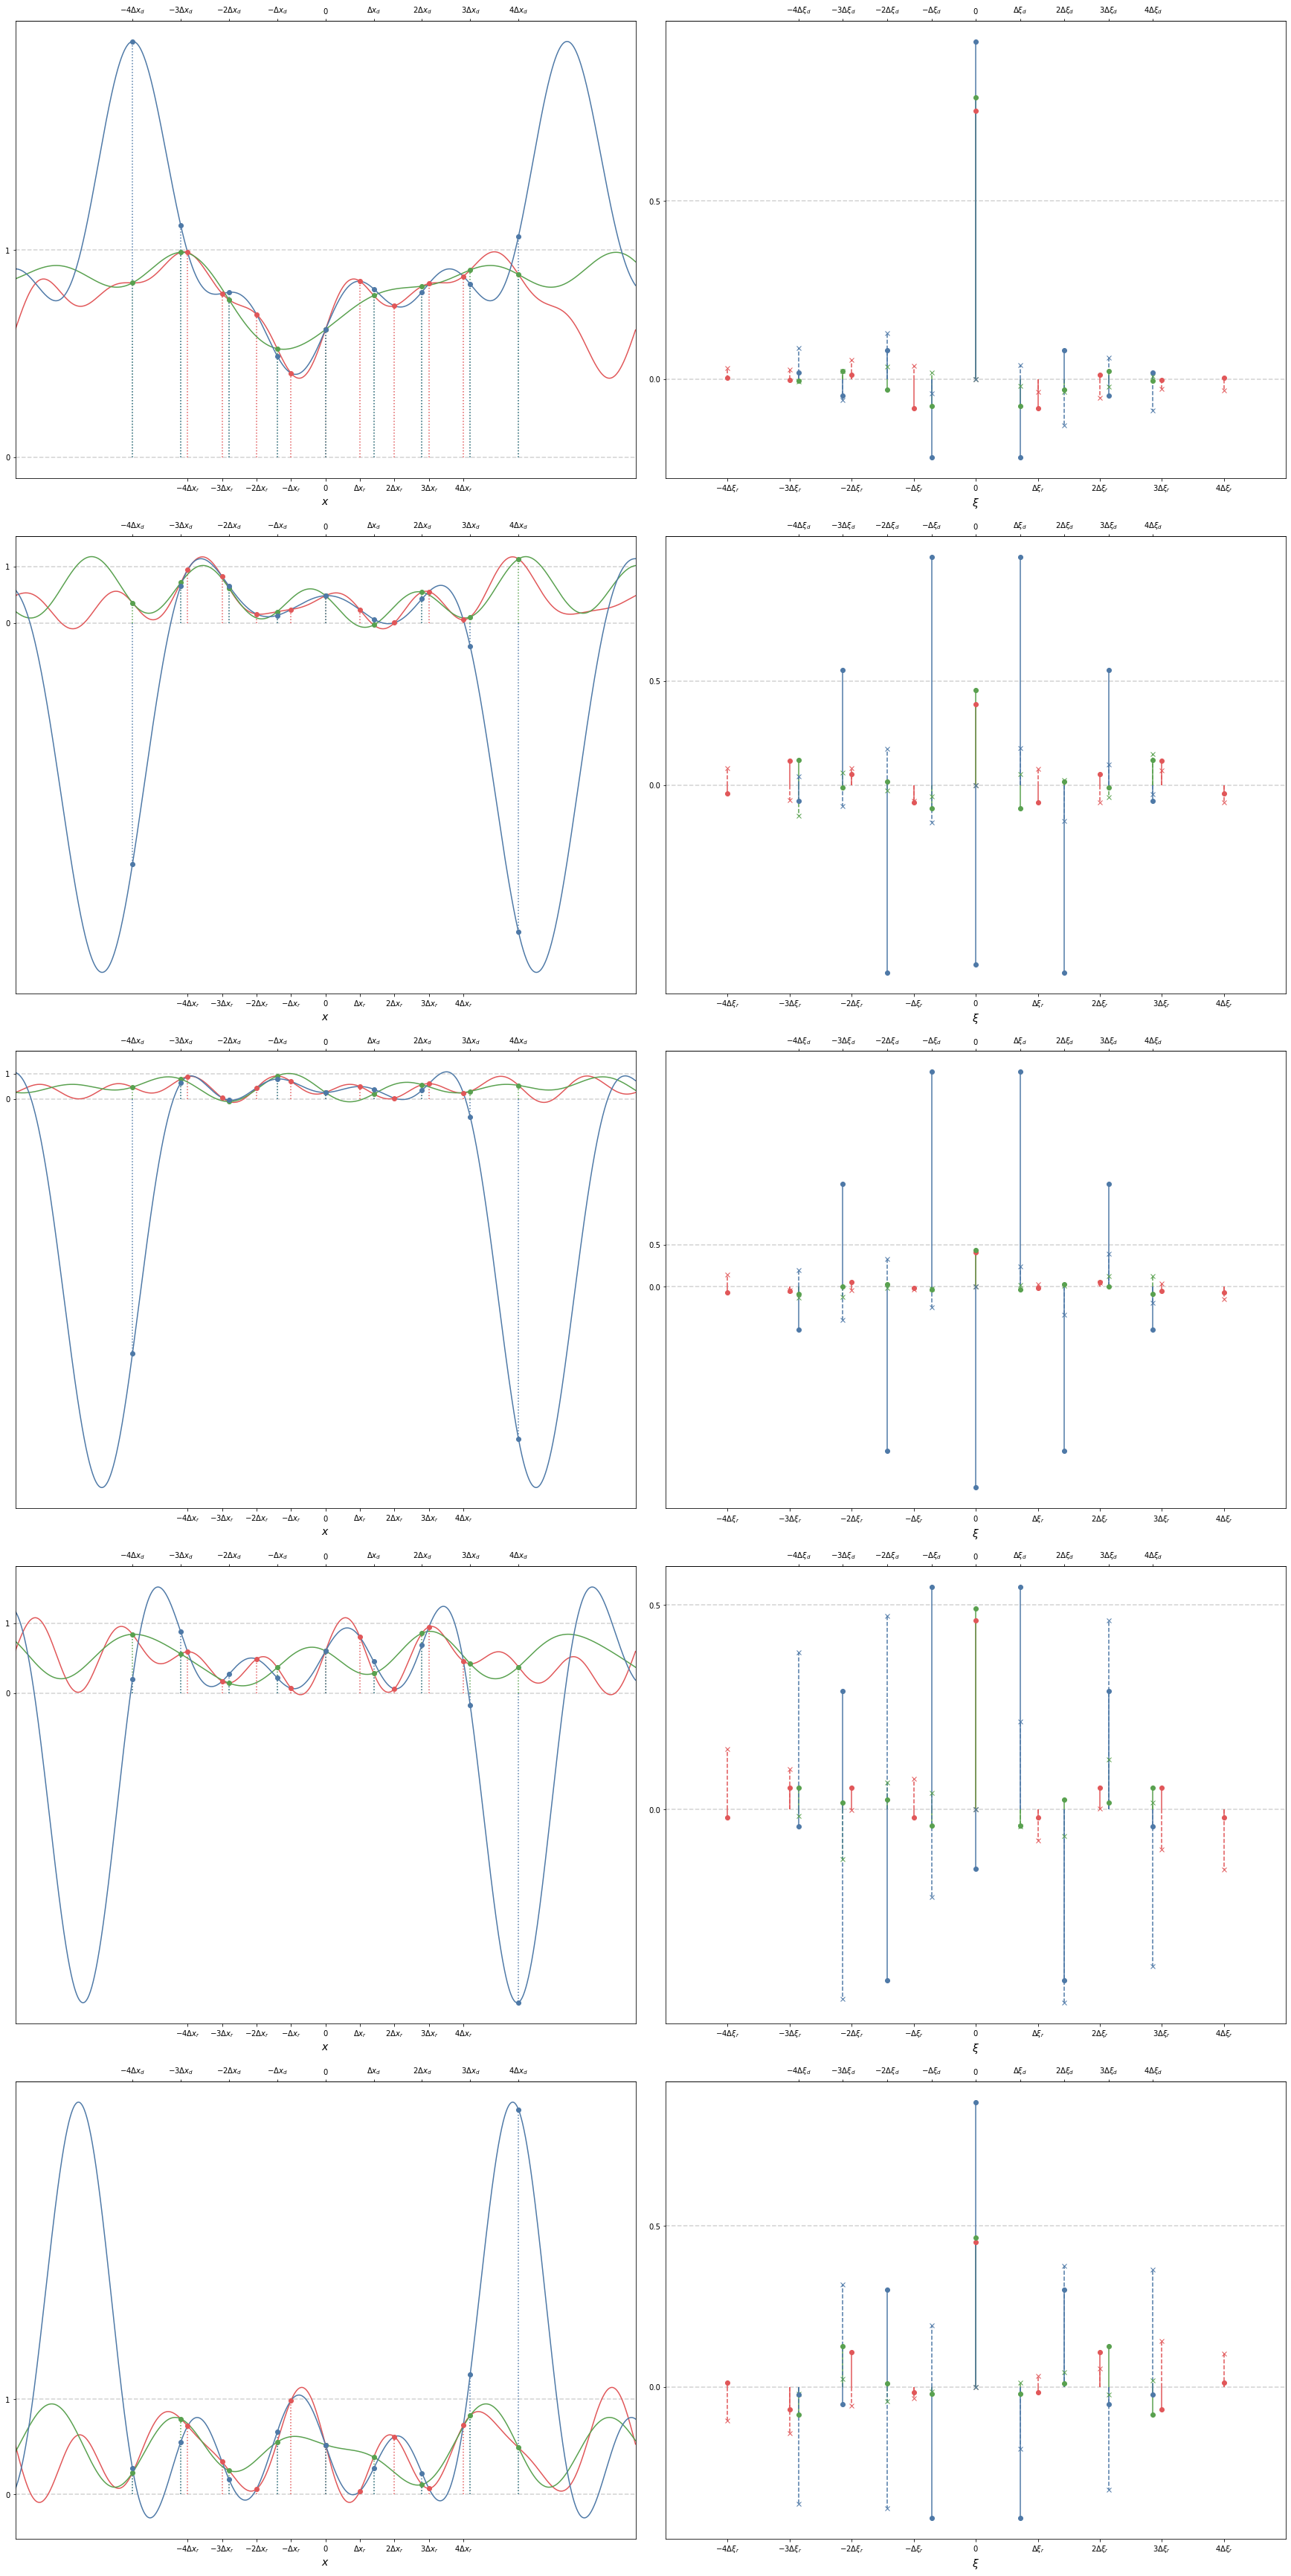

In [1]:
import numpy as np
from scipy import misc, fft as scipy_fft
from matplotlib import pyplot, colors, cm

colors.get_named_colors_mapping().update({
    'lfd:signal': "#f28e2b",
    'lfd:a': "#4e79a7",
    'lfd:b': "#59a14f",
    'lfd:retina': "#e15759",
    'lfd:pupil': "#edc948",
})

def sampling_coordinates(n, s):
    return (np.arange(n) - (n-1)/2) * s/n

def evaluate(x, xi, amplitudes, phases):
    return np.sum(amplitudes * np.cos(2.0 * np.pi * xi * x[:, np.newaxis] + phases), axis=-1)

def spatial_display_to_eye(x_a, x_b, z_a, z_b, z_r, z_f):
    x_r = (1 - z_b/z_f) * z_r/(z_a - z_b) * x_a + (1 - z_a/z_f) * z_r/(z_b - z_a) * x_b
    x_p = z_b/(z_b - z_a) * x_a + xi_r + z_a/(z_a - z_b) * x_b
    return x_r, x_p

def spatial_eye_to_display(x_r, x_p, z_a, z_b, z_r, z_f):
    x_a = (z_a/z_r) * x_r + (1 - z_a/z_f) * x_p
    x_b = (z_b/z_r) * x_r + (1 - z_b/z_f) * x_p
    return x_a, x_b

def frequency_display_to_eye(xi_a, xi_b, z_a, z_b, z_r, z_f):
    xi_r = (z_a/z_r) * xi_a + (z_b/z_r) * xi_b
    xi_p = (1 - z_a/z_f) * xi_a + (1 - z_b/z_f) * xi_b
    return xi_r, xi_p

def frequency_eye_to_display(xi_r, xi_p, z_a, z_b, z_r, z_f):
    xi_a = (1 - z_b/z_f) * z_r/(z_a - z_b) * xi_r + z_b/(z_b - z_a) * xi_p
    xi_b = (1 - z_a/z_f) * z_r/(z_b - z_a) * xi_r + z_a/(z_a - z_b) * xi_p

n = 9
s_r = 1.0
s_d = 1.4

x_plot_size = 2.0
xi_plot_size = 10.0

plot_resolution = 2048

x = sampling_coordinates(plot_resolution, x_plot_size)

x_r = sampling_coordinates(n, s_r)
x_d = sampling_coordinates(n, s_d)

xi_r = sampling_coordinates(n, n/s_r)
xi_d = sampling_coordinates(n, n/s_d)

sample_indices = sampling_coordinates(n, n).astype(np.int8)

x_r_labels = [fr'${tick}\Delta x_r$' for tick in sample_indices.astype(np.int8)]
x_d_labels = [fr'${tick}\Delta x_d$' for tick in sample_indices.astype(np.int8)]
xi_r_labels = [fr'${tick}\Delta\xi_r$' for tick in sample_indices.astype(np.int8)]
xi_d_labels = [fr'${tick}\Delta\xi_d$' for tick in sample_indices.astype(np.int8)]

x_r_labels[n//2-1:n//2+2] = [r'$-\Delta x_r$', r'$0$', r'$\Delta x_r$']
x_d_labels[n//2-1:n//2+2] = [r'$-\Delta x_d$', r'$0$', r'$\Delta x_d$']
xi_r_labels[n//2-1:n//2+2] = [r'$-\Delta\xi_r$', r'$0$', r'$\Delta\xi_r$']
xi_d_labels[n//2-1:n//2+2] = [r'$-\Delta\xi_d$', r'$0$', r'$\Delta\xi_d$']

fig, axs = pyplot.subplots(1, 2, constrained_layout=True, figsize=(24, 1.2))

axs[0].set_xlabel(r'$x$', fontsize=14)
axs[0].set_xticks(x_r)
axs[0].set_xticklabels(x_r_labels)
top_ax = axs[0].secondary_xaxis('top')
top_ax.set_xticks(x_d)
top_ax.set_xticklabels(x_d_labels)
axs[0].set_xlim(-x_plot_size/2, x_plot_size/2)
axs[0].set_yticks([])
axs[0].set_ylim(-0.5, 0.5)

axs[1].set_xlabel(r'$\xi$', fontsize=14)
axs[1].set_xticks(xi_r)
axs[1].set_xticklabels(xi_r_labels)
top_ax = axs[1].secondary_xaxis('top')
top_ax.set_xticks(xi_d)
top_ax.set_xticklabels(xi_d_labels)
axs[1].set_xlim(-xi_plot_size/2, xi_plot_size/2)
axs[1].set_yticks([])
axs[1].set_ylim(-0.5, 0.5)

[ln.set_color('lfd:a') for ln in axs[0].stem(x_d, [0]*n, linefmt=':', basefmt='none')[0:2]]
axs[0].vlines([-s_d/2, s_d/2], -1, 2, color='lfd:a', zorder=-1)
[ln.set_color('lfd:retina') for ln in axs[0].stem(x_r, [0]*n, linefmt=':', basefmt='none')[0:2]]
axs[0].vlines([-s_r/2, s_r/2], -1, 2, color='lfd:retina', zorder=-1)

[ln.set_color('lfd:a') for ln in axs[1].stem(xi_d, [0]*n, linefmt=':', basefmt='none')[0:2]]
axs[1].vlines([-(n/s_d)/2, (n/s_d)/2], -1, 2, color='lfd:a', zorder=-1)
[ln.set_color('lfd:retina') for ln in axs[1].stem(xi_r, [0]*n, linefmt=':', basefmt='none')[0:2]]
axs[1].vlines([-(n/s_r)/2, (n/s_r)/2], -1, 2, color='lfd:retina', zorder=-1)

fig, axs = pyplot.subplots(5, 2, constrained_layout=True, figsize=(24, 48))

for ax in axs[:, 0]:
    ax.set_xlabel(r'$x$', fontsize=14)
    ax.set_xticks(x_r)
    ax.set_xticklabels(x_r_labels)
    top_ax = ax.secondary_xaxis('top')
    top_ax.set_xticks(x_d)
    top_ax.set_xticklabels(x_d_labels)
    ax.set_xlim(-x_plot_size/2, x_plot_size/2)
    ax.set_yticks([0.0, 1.0])
    ax.hlines([0.0, 1.0], -x_plot_size/2, x_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)

for ax in axs[:, 1]:
    ax.set_xlabel(r'$\xi$', fontsize=14)
    ax.set_xticks(xi_r)
    ax.set_xticklabels(xi_r_labels)
    top_ax = ax.secondary_xaxis('top')
    top_ax.set_xticks(xi_d)
    top_ax.set_xticklabels(xi_d_labels)
    ax.set_xlim(-xi_plot_size/2, xi_plot_size/2)
    ax.set_yticks([0.0, 0.5])
    ax.hlines([0.0, 0.5], -xi_plot_size/2, xi_plot_size/2, linestyle='dashed', color='lightgrey', zorder=-1)

for index in range(5):
    values_r = np.random.sample(n)
    spectrum_r = scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(values_r)))/n
    amplitudes_r = np.abs(spectrum_r)
    phases_r = np.angle(spectrum_r)

    values_d_post = evaluate(x_d, xi_r, amplitudes_r, phases_r)
    spectrum_d_post = scipy_fft.fftshift(scipy_fft.fft(scipy_fft.ifftshift(values_d_post)))/n
    amplitudes_d_post = np.abs(spectrum_d_post)
    phases_d_post = np.angle(spectrum_d_post)

    even_spectrum = scipy_fft.rfft(scipy_fft.ifftshift(evaluate(x_r, xi_d[n//2:, np.newaxis, np.newaxis], 1.0, 0.0), axes=-1), axis=-1)/n
    odd_spectrum = scipy_fft.rfft(scipy_fft.ifftshift(evaluate(x_r, xi_d[n//2+1:, np.newaxis, np.newaxis], 1.0, np.pi/2), axes=-1), axis=-1)/n

    matrix = np.vstack((even_spectrum, odd_spectrum))
    matrix = np.hstack((np.real(matrix), np.imag(matrix[:, 1:])))

    output_spectrum = scipy_fft.rfft(scipy_fft.ifftshift(values_r))/n
    output_spectrum = np.hstack((np.real(output_spectrum), np.imag(output_spectrum[1:])))

    input_spectrum = np.linalg.solve(matrix.T, output_spectrum)
    input_spectrum = input_spectrum[:n//2+1] + 1j * np.insert(input_spectrum[n//2+1:], 0, 0)
    input_spectrum = np.hstack((np.conjugate(np.flip(input_spectrum[1:]))/2, input_spectrum[0:1], input_spectrum[1:]/2))

    amplitudes_d_pre = np.abs(input_spectrum)
    phases_d_pre = np.angle(input_spectrum)

    axs[index, 0].plot(x, evaluate(x, xi_r, amplitudes_r, phases_r), color='lfd:retina')
    axs[index, 0].plot(x, evaluate(x, xi_d, amplitudes_d_post, phases_d_post), color='lfd:b')
    axs[index, 0].plot(x, evaluate(x, xi_d, amplitudes_d_pre, phases_d_pre), color='lfd:a')
    [ln.set_color('lfd:retina') for ln in axs[index, 0].stem(x_r, values_r, linefmt=':', basefmt='none')[0:2]]
    [ln.set_color('lfd:b') for ln in axs[index, 0].stem(x_d, values_d_post, linefmt=':', basefmt='none')[0:2]]
    [ln.set_color('lfd:a') for ln in axs[index, 0].stem(x_d, evaluate(x_d, xi_d, amplitudes_d_pre, phases_d_pre), linefmt=':', basefmt='none')[0:2]]

    [ln.set_color('lfd:retina') for ln in axs[index, 1].stem(xi_r, np.imag(spectrum_r), linefmt='--', basefmt='none', markerfmt='x')[0:2]]
    [ln.set_color('lfd:retina') for ln in axs[index, 1].stem(xi_r, np.real(spectrum_r), linefmt='-', basefmt='none')[0:2]]
    [ln.set_color('lfd:b') for ln in axs[index, 1].stem(xi_d, np.imag(spectrum_d_post), linefmt='--', basefmt='none', markerfmt='x')[0:2]]
    [ln.set_color('lfd:b') for ln in axs[index, 1].stem(xi_d, np.real(spectrum_d_post), linefmt='-', basefmt='none')[0:2]]
    [ln.set_color('lfd:a') for ln in axs[index, 1].stem(xi_d, np.imag(input_spectrum), linefmt='--', basefmt='none', markerfmt='x')[0:2]]
    [ln.set_color('lfd:a') for ln in axs[index, 1].stem(xi_d, np.real(input_spectrum), linefmt='-', basefmt='none')[0:2]]